### 1.Explain: Data Cleaning & Preprocessing
### •Load the dataset and check for missing values.
### •Fill missing Age values with median or mean.
### •Handle missing Embarked values by filling with the most common port.
Ans: Data cleaning and preprocessing is the step where raw data is fixed, completed, and transformed so it        becomes reliable and ready for analysis or modeling. It includes finding and correcting errors, handling missing values, removing irrelevant features, and standardizing formats so the dataset is accurate and consistent

In [1]:
# •Load the dataset and check for missing values.
import pandas as pd
df = pd.read_csv("test.csv")
print(df.isnull().sum())



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [2]:
# •Fill missing Age values with median or mean.
df["Age"] = df["Age"].fillna(df["Age"].median())
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [3]:
# •Handle missing Class values by filling with the most common port.
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [4]:
print(df.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')


In [13]:
# •Drop unnecessary columns like Name, Ticket, Cabin for visualization purposes.
df = df.drop(columns=["Name", "Ticket", "Cabin"])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


### 2. Univariate Analysis
### •Plot the distribution of Age using a histogram and a KDE plot.
### •Plot the count of passengers by Sex using a bar chart.
Ans: Univariate analysis means analyzing and visualizing one variable at a time to understand its distribution, center, and spread. It helps you see patterns like skewness, outliers, and imbalance before you move on to relationships between variables

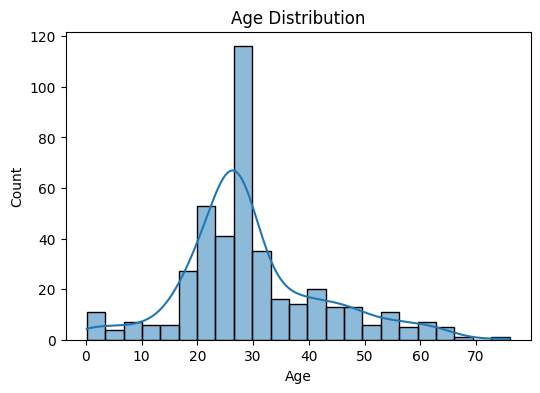

In [6]:
# •Plot the distribution of Age using a histogram and a KDE plot.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()



In [7]:
# print(df.columns)

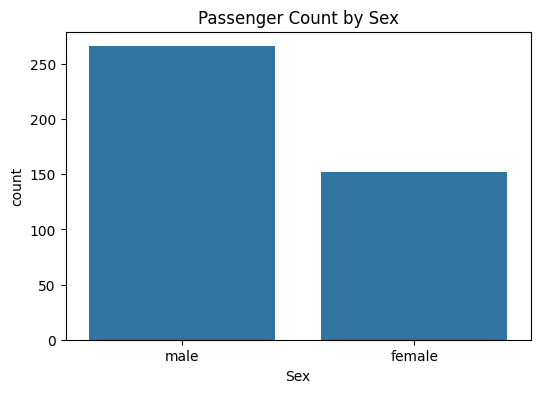

In [8]:
# •Plot the count of passengers by Sex using a bar chart.
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=df)
plt.title("Passenger Count by Sex")
plt.show()

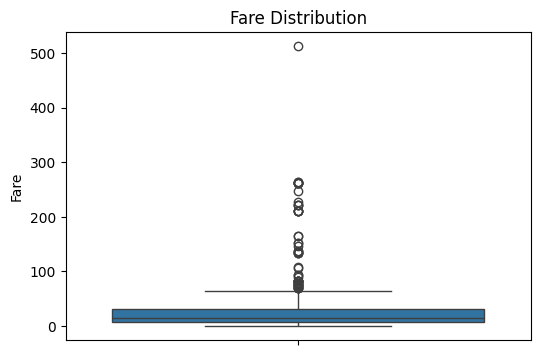

In [9]:
# •Show the distribution of Fare using a boxplot.
plt.figure(figsize=(6,4))
sns.boxplot(y="Fare", data=df)
plt.title("Fare Distribution")
plt.show()

### 3. Bivariate Analysis
### •Compare survival rate across Sex using a countplot.
### •Compare Pclass vs Fare using a boxplot.
### •Visualize Age vs Fare using a scatter plot, color-coded by Survived.
Ans: Bivariate analysis means studying the relationship between two variables at the same time to see how they are linked or how one changes with the other. It can involve numerical–numerical, numerical–categorical, or categorical–categorical pairs, usually visualized with plots like scatterplots, boxplots, or grouped bar charts.

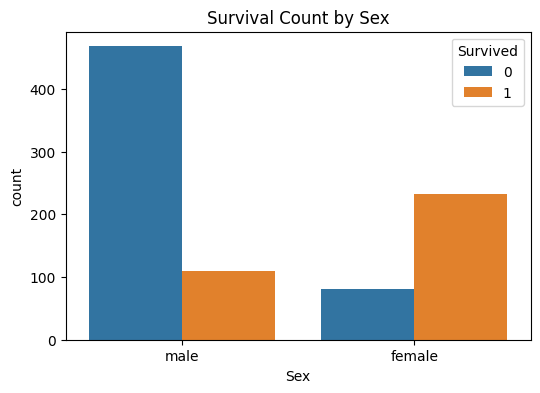

In [10]:
# •Compare survival rate across Sex using a countplot.
df = pd.read_csv("train.csv")
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Count by Sex")
plt.show()

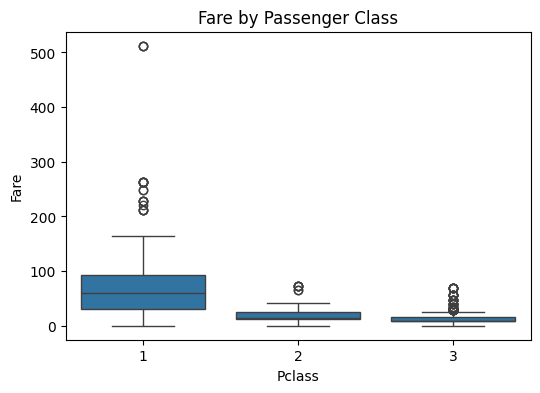

In [11]:
#  •Compare Pclass vs Fare using a boxplot.
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare by Passenger Class")
plt.show()

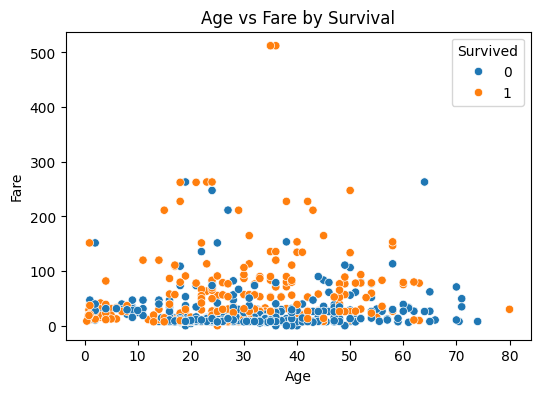

In [12]:
# •Visualize Age vs Fare using a scatter plot, color-coded by Survived.
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Age vs Fare by Survival")
plt.show()